In [1]:
import sys, scipy
sys.path.append('./../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
#from systematics_module.corr import *

In [3]:
# calling map 
#GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
#GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]

#pixarea = hp.nside2pixarea( 4096, degrees = True)
#sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
#st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
#SPTMaparea = pixarea * sptnpix
#ST82Maparea = pixarea * st82npix

In [2]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_full = esutil.io.read([path+'galaxy_DR12v5_CMASS_South.fits.gz', 
                             path+'galaxy_DR12v5_CMASS_North.fits.gz'],combine=True)
#cmass_sgc = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.75)]
random_full = esutil.io.read([path+'random0_DR12v5_CMASS_South.fits.gz',
                              path+'random0_DR12v5_CMASS_North.fits.gz'],combine=True)
#random_sgc = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.75)]

w_full = cmass_full['WEIGHT_SYSTOT']*( cmass_full['WEIGHT_CP'] + cmass_full['WEIGHT_NOZ'] - 1. )
w_rand_full = random_full['WEIGHT_FKP']
cmass_full = appendColumn(cmass_full, name = 'WEIGHT', value = w_full)
random_full = appendColumn(random_full, name = 'WEIGHT_RAND', value = w_rand_full)

reading 1/2 /n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz
reading 2/2 /n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz
reading 1/2 /n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_South.fits.gz
reading 2/2 /n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_North.fits.gz


In [28]:
#tree corr
from systematics_module.corr import angular_correlation, angular_correlation_poisson
angular_correlation_poisson(data = cmass_full, rand = random_full,  
                    weight_data = True, weight_rand=True, nbins=10,
                    suffix = '_cmass_full_sys_cp_nz_weight_nbins10_jk200', 
                    dir = basedir)

saving data file to :  ../data_txt//acf_auto_poisson_cmass_full_sys_cp_nz_weight_nbins10_jk200.txt


In [3]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = '../data_txt/'

#randind1 = np.random.choice(cmass_full.size, size = cmass_full.size)
#randind2 = np.random.choice(random_full.size, size = random_full.size)

angular_correlation(data = cmass_full, rand = random_full,  
                    weight = [True, True], njack = 100, nbins=10, mpi=False, 
                    suffix = '_cmass_full_sys_cp_nz_weight_nbins10_jk100', 
                    dir = basedir, jkfile = 'jkregion.cmass_full_jk100')


calculate angular correlation function
X (1843, 2)  centers (100, 2)  tol=1e-05  maxiter=200
24 iterations  cluster sizes: [16 33 22 17  7 14 21 14 15 16 16 16 12  9 15 19 29 23 15 26  8 13 14 27
 17  9 15 14 17 22 21 15 18 26 19 15 27 17 20 23 20 17 15 18 23 18 17 17
 25 25 22 15 15 18 15 23 23 17 17 13 15 11 18 19 20 30 19  9 26 22 24 18
 14 19 14 25 17 23 24 23 10 11 15 19 22 24 19 22 17 10 23 18 34 35 27  7
 14  9 19 13]
X (849637, 2)  centers (100, 2)  tol=1e-05  maxiter=200
92 iterations  cluster sizes: [ 8413  9514  9539  7822  8503  8379  8126  7813  8989  9314  7407  7713
  8273  8433  8843  8662  9199  9153  7885  7437  8409  8074  9411  8332
  7572  9025  7321  7679  7539  7120  8492  7472  7708  7331  8245  8688
  8762  9312  9130  8327  9600  8600  7593  8090  8368  8901  8390  8664
  9207  9087  8904  8752  9755  9221  8696  7507  8746  8644 10118  8768
  8735  8157  8514  8994  8518  8391  9243  9430  8942  8764  7869  8549
  8156  8904  8681  8803  9372  7792  8152  628

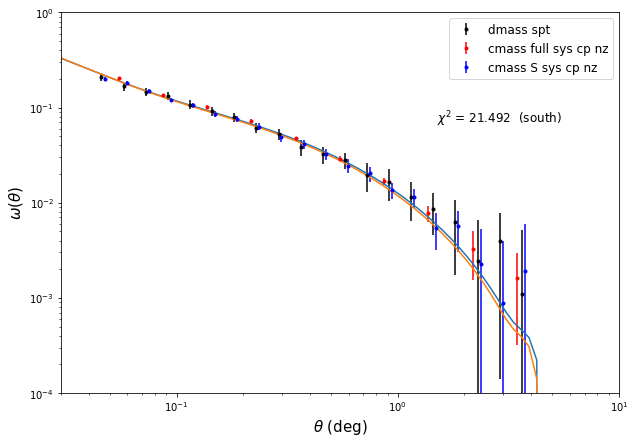

In [47]:

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

### NGC
DAT11 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]


fig, ax = plt.subplots(figsize = (10, 7))

ax.errorbar(meanr*0.97, xi, yerr = xi_err, fmt = '.', color='k', label='dmass spt')
ax.errorbar(meanr7*1.0, xi7, yerr = xi_err7, fmt = '.r', label='cmass full sys cp nz')
ax.errorbar(meanr11*1.0, xi11, yerr = xi_err11, fmt = '.b', label='cmass S sys cp nz')
ax.plot(theta_th, theory)
ax.plot(theta_th, theory_sgc)

cov_cmass_n = np.genfromtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.cov')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-4,1)
ax.set_xlim(0.03, 10)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

#fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



In [ ]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = '../data_txt/'

w_full = cmass_full['WEIGHT_SYSTOT']*( cmass_full['WEIGHT_CP'] + cmass_full['WEIGHT_NOZ'] - 1. )
w_rand_full = random_full['WEIGHT_FKP']

#cmass_full = appendColumn(cmass_full, name = 'WEIGHT', value = w_full)
#random_full = appendColumn(random_full, name = 'WEIGHT_RAND', value = w_rand_full)

angular_correlation(data = cmass_full, rand = random_full, nbins=10, 
                    weight = [True, True], njack = 100, 
                    suffix = '_cmass_full_sys_cp_nz_weight_nbins10_jk100', 
                    dir = basedir, jkfile = 'jkregion.cmass_full_jk100')



In [ ]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = '../data_txt/'

w_full = cmass_full['WEIGHT_SYSTOT']*( cmass_full['WEIGHT_CP'] + cmass_full['WEIGHT_NOZ'] - 1. )
w_rand_full = random_full['WEIGHT_FKP']

#cmass_full = appendColumn(cmass_full, name = 'WEIGHT', value = w_full)
#random_full = appendColumn(random_full, name = 'WEIGHT_RAND', value = w_rand_full)

angular_correlation(data = cmass_full, rand = random_full, nbins=10, weight = None, njack = 100, 
                    suffix = '_cmass_full_sys_cp_nz_weight_nbins10_jk100', dir = basedir)



In [71]:
#path = '/n/des/lee.5922/data/cmass_cat/'
#cmass_sgc_full = esutil.io.read(path+'cmass-dr12v4-S-Reid-full.dat.fits')

In [72]:
#cmass_ngc_full = esutil.io.read(path+'cmass-dr12v4-N-Reid-full.dat.fits')

In [73]:
np.sum(Ns**2)

int_nzs = scipy.integrate.simps(Ns**2, dx=step)
int_nzn = scipy.integrate.simps(Nn**2, dx=step)
nzs_ratio = int_nzs/int_nzn
print nzs_ratio
print int_nzs, int_nzn

0.9526592040362819
3.510273768103103 3.6847109157509537


In [74]:
int_nzs1 = scipy.integrate.simps(Ns, dx=step)
int_nzn1 = scipy.integrate.simps(Nn, dx=step)
nzs_ratio1 = int_nzs1/int_nzn1
print nzs_ratio1

1.0003808917438763


In [75]:
spatialcheck([random_sgc, cmass_sgc], dir='../figure/')

NameError: name 'random_sgc' is not defined

In [5]:
# dmass spt
#dmass_spt = fitsio.read('result_cat/dmass_spt.fits')
dmass_spt = esutil.io.read('../output/n2_2/dmass_spt.fits')

In [169]:
random_spt = uniform_random_on_sphere(dmass_spt, size = 30 * dmass_spt.size)
random_spt = Cuts.keepGoodRegion(random_spt)

In [246]:
dmass_spt_weight = esutil.io.read('../output/test/dmass_spt.fits')
angular_correlation(data = dmass_spt_weight, rand = random_spt, weight = None, njack = 20, 
                    suffix = '_dmass_spt_weight_training_jk20', dir =  '../data_txt/')

calculate angular correlation function
X (670, 2)  centers (20, 2)  tol=1e-05  maxiter=200
27 iterations  cluster sizes: [28 34 34 33 40 37 36 45 33 26 37 38 38 19 46 27 28 27 29 35]
X (112355, 2)  centers (20, 2)  tol=1e-05  maxiter=200
20 iterations  cluster sizes: [4449 6002 5552 5070 4950 4976 6363 7358 6203 5436 5948 5679 7028 5190
 6327 5566 3163 5380 5401 6314]
. . . . . . . . . . . . . . . . . . . . . saving data file to :  ../data_txt//acf_auto_dmass_spt_weight_training_jk20.txt


In [355]:
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, njack = 50, 
#                    suffix = '_dmass_spt_rand', dir = basedir)

#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( 1.0 + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_rand = random_sgc['WEIGHT_FKP']

#w_sgc = cmass_sgc['WEIGHT_SYSTOT']*cmass_sgc['WEIGHT_NOZ']
w_sgc = cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = np.ones(random_sgc.size) #random_sgc['WEIGHT_FKP']

cmass_sgc = appendColumn(cmass_sgc, name = 'WEIGHT', value = w_sgc)
random_sgc = appendColumn(random_sgc, name = 'WEIGHT_RAND', value = w_rand)

random_ind = np.random.choice( random_sgc.size, size = random_sgc.size/10)
angular_correlation(data = cmass_sgc, rand = random_sgc[random_ind], nbins=10, njack = 100, weight = [True, True], 
                    suffix = '_cmass_sgc_sys_cp_nz_weight_nbins10_jk100', dir = '../data_txt/' )


calculate angular correlation function
X (1000, 2)  centers (100, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [19 13  5  7 12 14  4 12  7  5 13  7  8  7 20 11 12  3  5  6 12  7 17 16
 13 13 16  9 22 11 10 14  7 14 13 15 10  8 12  8  4  7  8  7 15  8 10  7
  6 11  5  8  8 13  9  3 12 11  7 10 12 10  8  8  5  9  8 11  6 14  9 17
  7 11  8 11 11 14 21  1 14  9 11  7  7 11  2 15  9  8  6 15 10  8  7  6
 19  5 12 12]
X (230831, 2)  centers (100, 2)  tol=1e-05  maxiter=200
127 iterations  cluster sizes: [2199 2029 2100 2255 2730 2145 1925 2287 2633 1549 2754 2319 1901 2357
 2964 3100 2375 2648 2206 2691 2276 1723 2509 2444 2829 1957 2386 2345
 2843 2440 1848 2328 2754 2567 1921 1818 2285 2055 2464 2397 2503 1783
 2188 2692 2659 2328 1914 1892 1861 2262 2225 2656 2624 2409 2394 2371
 2287 2314 2561 1788 2508 2386 2676 1953 2171 2430 1501 2674 2676 2329
 2713 2295 2361 2220 2350 2522 2240 2523 1951 1191 2397 2330 2309 2516
 1773 2410 1617 2496 2444 2151 1985 2112 2434 2174 3116 20

In [347]:
help(angular_correlation)

Help on function angular_correlation in module systematics_module.corr:

angular_correlation(data=None, rand=None, njack=30, nbins=20, min_sep=0.041666666666666664, max_sep=4.166666666666667, weight=None, mpi=True, suffix='', out=None, dir='./')



In [84]:
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, njack = 50, 
#                    suffix = '_dmass_spt_rand', dir = basedir)

#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( 1.0 + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_sgc = cmass_sgc['WEIGHT_FKP']
#w_rand = random_sgc['WEIGHT_FKP']

#cmass_sgc = appendColumn(cmass_sgc, name = 'WEIGHT', value = w_sgc)
#random_sgc = appendColumn(random_sgc, name = 'WEIGHT_RAND', value = w_rand)

w_sgc_full = ( 1. + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = random_sgc['WEIGHT_FKP']

cmass_sgc_full = appendColumn(cmass_sgc_full, name = 'WEIGHT', value = w_sgc_full)
random_sgc = appendColumn(random_sgc, name = 'WEIGHT_RAND', value = w_rand)

random_ind = np.random.choice( random_sgc.size, size = random_sgc.size/10)
angular_correlation(data = cmass_sgc_full, rand = random_sgc[random_ind], njack = 20, weight = [True, True], 
                    suffix = '_cmass_sgc_full_nz_weight_jk20', dir = '../data_txt/' )


calculate angular correlation function
X (1017, 2)  centers (20, 2)  tol=1e-05  maxiter=200
12 iterations  cluster sizes: [25 21 40 24 39 50 60 52 84 70 61 85 81 52 48 25 70 41 30 59]
X (258884, 2)  centers (20, 2)  tol=1e-05  maxiter=200
84 iterations  cluster sizes: [12524 12119 12094  9516 12612 11957 13301 14416 13044 15654 12694 14168
 13515 13303 15429  9971 14614 13031 11536 13386]
. . . . . . . . . . . . . . . . . . . . . saving data file to :  ../data_txt//acf_auto_cmass_sgc_full_nz_weight_jk20.txt


In [356]:
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, njack = 50, 
#                    suffix = '_dmass_spt_rand', dir = basedir)

#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_sgc = cmass_sgc['WEIGHT_FKP']*cmass_sgc['WEIGHT_SYSTOT']*( 1.0 + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_rand = random_sgc['WEIGHT_FKP']

#w_ngc = cmass_ngc['WEIGHT_FKP']*cmass_ngc['WEIGHT_SYSTOT']*( cmass_ngc['WEIGHT_CP'] + cmass_ngc['WEIGHT_NOZ'] - 1. )
#w_rand = random_ngc['WEIGHT_FKP']

#w_ngc = cmass_ngc['WEIGHT_SYSTOT']*( cmass_ngc['WEIGHT_CP'] + cmass_ngc['WEIGHT_NOZ'] - 1. )

w_ngc = cmass_ngc['WEIGHT_SYSTOT']*( cmass_ngc['WEIGHT_CP'] + cmass_ngc['WEIGHT_NOZ'] - 1. )
w_rand = np.ones(random_ngc.size) #random_sgc['WEIGHT_FKP']

cmass_ngc = appendColumn(cmass_ngc, name = 'WEIGHT', value = w_ngc)
random_ngc = appendColumn(random_ngc, name = 'WEIGHT_RAND', value = w_rand)

random_ind = np.random.choice( random_ngc.size, size = random_ngc.size/10)
angular_correlation(data = cmass_ngc, rand = random_ngc[random_ind], njack = 100, nbins=10, weight = [True, True], 
                    suffix = '_cmass_ngc_sys_cp_nz_weight_nbin10_jk100', dir = '../data_txt/' )



calculate angular correlation function
X (1573, 2)  centers (100, 2)  tol=1e-05  maxiter=200
16 iterations  cluster sizes: [23 11 24 14 21 19  7  8 20 19 20 23 14 18 18  9 25 16  9 17 12 14 26 23
 15 16 16 10 26  7 21  8 12 18 19 17 26  8 24 18 12 18 11 15 16  8 20 14
 11 18  8 10 13 21  7 19 22 17 14 24 15 17 12 25  9 13 21 17 12 26 11 23
 12 15 10 17 23 12 17 19 17 15 24  7  8  5 14 24 12 21 19  8  9 13 12 21
 15 11 14  9]
X (618806, 2)  centers (100, 2)  tol=1e-05  maxiter=200
98 iterations  cluster sizes: [6844 6073 7101 5737 6754 6279 4103 5432 6168 6688 7733 5515 4787 5243
 6352 5029 6078 6096 4966 7873 5932 6084 7393 7355 5188 5559 6198 6067
 5525 5657 6854 5504 5847 7479 7030 7265 6357 6335 5051 7298 5187 6603
 5935 7647 5471 7007 6307 6089 7377 6239 4958 6861 5768 6234 7048 5874
 6750 6496 5449 7394 5747 5381 4829 6725 6035 7438 6625 6547 6476 7659
 5909 6241 5290 6905 5773 6458 6162 6579 7090 5931 6947 6642 5679 5289
 5870 5129 7320 6714 6046 6671 6681 5859 5552 6320 4373 563

In [138]:
random_ind = np.random.choice( random_ngc.size, size = random_ngc.size/10)
angular_correlation(data = cmass_ngc_full, rand = random_ngc[random_ind], njack = 20, weight = [False, False], 
                    suffix = '_cmass_ngc_full_no_weight_jk20', dir = '../data_txt/' )


calculate angular correlation function
X (1655, 2)  centers (20, 2)  tol=1e-05  maxiter=200
16 iterations  cluster sizes: [ 51  65  71 102  74 100  91  71  85  84  67 101 121  82  61  91  80  56
  81 121]
X (685567, 2)  centers (20, 2)  tol=1e-05  maxiter=200
57 iterations  cluster sizes: [31595 33647 36197 36934 34311 36014 36704 37782 36180 32313 34258 33270
 31188 35262 29207 36706 32121 28806 36571 36501]
. . . . . . . . . . . . . . . . . . . . . saving data file to :  ../data_txt//acf_auto_cmass_ngc_full_no_weight_jk20.txt


In [78]:
print cmass_sgc_full['WEIGHT_NOZ'].max()
print cmass_sgc_full['WEIGHT_NOZ'].min()

8.0
1.0


In [158]:
mv ../data_txt/acf_auto_cmass_sgc_fkp_sys_cp_nz_weight_jk100.txt ../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.txt

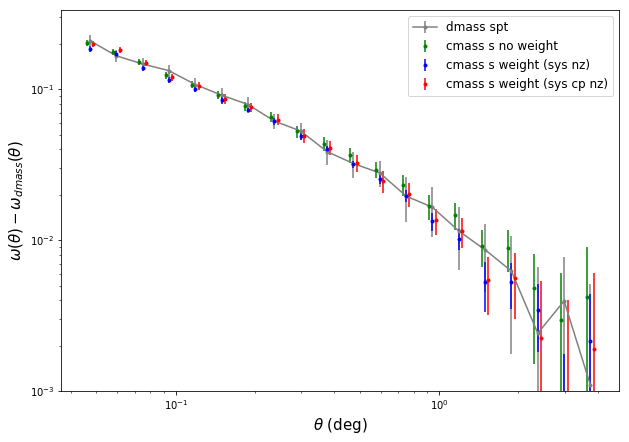

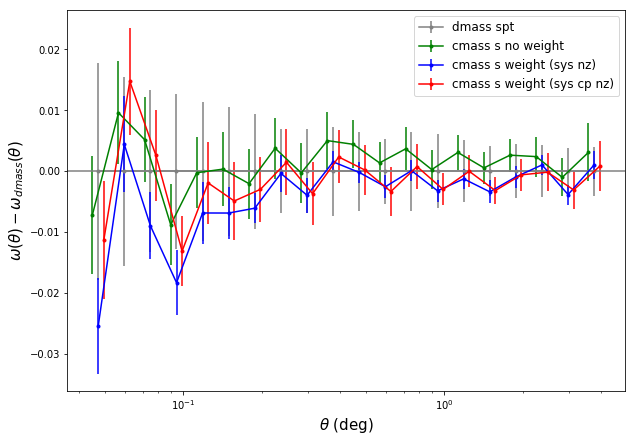

In [329]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT12 = np.loadtxt('../data_txt/acf_auto_dmass_spt_weight_training_jk20.txt')
meanr12, xi12, xi_err12 = [DAT12[:,i] for i in range(3)]




#DAT2 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no3.txt')
DAT2 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_weight.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

DAT3 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no_cpweight.txt')
meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

DAT4 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no_weight.txt')
meanr4, xi4, xi_err4 = [DAT4[:,i] for i in range(3)]

DAT5 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_full_no_weight.txt')
meanr5, xi5, xi_err5 = [DAT5[:,i] for i in range(3)]

DAT6 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_fkp_weight_jk20.txt')
meanr6, xi6, xi_err6 = [DAT6[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT8 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_nz_weight_jk20.txt')
meanr8, xi8, xi_err8 = [DAT8[:,i] for i in range(3)]



### NGC
DAT9 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_full_no_weight_jk20.txt')
meanr9, xi9, xi_err9 = [DAT9[:,i] for i in range(3)]

DAT10 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_fkp_sys_cp_nz_weight_jk20.txt')
meanr10, xi10, xi_err10 = [DAT10[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]



fig, ax = plt.subplots(figsize = (10, 7))

ax.axhline(y = 0.0, color = 'grey')
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.-', color='grey', label='dmass spt')
#ax.errorbar(meanr12, xi12, yerr = xi_err12, fmt = '--', color='grey', label='dmass spt training')
#ax.errorbar(meanr2*1.02, xi2, yerr = xi_err2, fmt = '.k', label='cmass s weight')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='cmass s no cp weight')
ax.errorbar(meanr4*0.97, xi4, yerr = xi_err4, fmt = '.g', label='cmass s no weight')
#ax.errorbar(meanr6*1.0, xi6, yerr = xi_err6, fmt = '.m', label='cmass s fkp weight')
ax.errorbar(meanr8*1.0, xi8, yerr = xi_err8, fmt = '.b', label='cmass s weight (sys nz)')
ax.errorbar(meanr7*1.03, xi7, yerr = xi_err7, fmt = '.r', label='cmass s weight (sys cp nz)')
#ax.errorbar(meanr5*1.0, xi5, yerr = xi_err5, fmt = '.b', label='cmass s full no w')


#ax.errorbar(meanr9*1.0, xi9, yerr = xi_err9, fmt = '--b', label='cmass n full no w')
#ax.errorbar(meanr10*1.05, xi10, yerr = xi_err10, fmt = '--g', label='cmass n fkp sys cp nz')
#ax.errorbar(meanr11*1.05, xi11, yerr = xi_err11, fmt = '--r', label='cmass n sys cp nz')

cov = np.genfromtxt('../data_txt/acf_auto_dmass_spt_no2.cov')
cov_cmass = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_no3.cov')
vdiff = xi - xi2
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov)), vdiff)/vdiff.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta) - \omega_{dmass}(\theta)$', fontsize = 15)

fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



fig, ax = plt.subplots(figsize = (10, 7))

ax.axhline(y = 0.0, color = 'grey')
ax.errorbar(meanr, xi-xi, yerr = xi_err, fmt = '.-', color='grey', label='dmass spt')
#ax.errorbar(meanr12, xi12, yerr = xi_err12, fmt = '--', color='grey', label='dmass spt training')
#ax.errorbar(meanr2*1.02, xi2, yerr = xi_err2, fmt = '.k', label='cmass s weight')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='cmass s no cp weight')
ax.errorbar(meanr4*0.95, xi4-xi, yerr = xi_err4, fmt = '.-g', label='cmass s no weight')
#ax.errorbar(meanr6*1.0, xi6, yerr = xi_err6, fmt = '.m', label='cmass s fkp weight')
ax.errorbar(meanr8*1.0, xi8-xi, yerr = xi_err8, fmt = '.-b', label='cmass s weight (sys nz)')
ax.errorbar(meanr7*1.05, xi7-xi, yerr = xi_err7, fmt = '.-r', label='cmass s weight (sys cp nz)')
#ax.errorbar(meanr5*1.0, xi5, yerr = xi_err5, fmt = '.b', label='cmass s full no w')


#ax.errorbar(meanr9*1.0, xi9, yerr = xi_err9, fmt = '--b', label='cmass n full no w')
#ax.errorbar(meanr10*1.05, xi10, yerr = xi_err10, fmt = '--g', label='cmass n fkp sys cp nz')
#ax.errorbar(meanr11*1.05, xi11, yerr = xi_err11, fmt = '--r', label='cmass n sys cp nz')

cov = np.genfromtxt('../data_txt/acf_auto_dmass_spt_no2.cov')
cov_cmass = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_no3.cov')
vdiff = xi - xi2
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov)), vdiff)/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta) - \omega_{dmass}(\theta)$', fontsize = 15)

fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')

In [11]:
theta_th, theory = np.loadtxt('../data_txt/acf_cmass_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

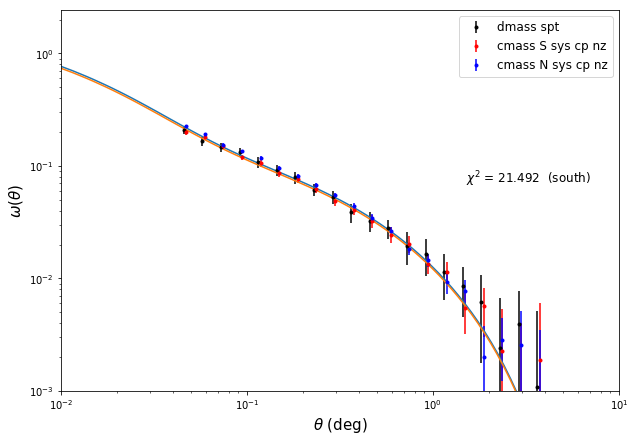

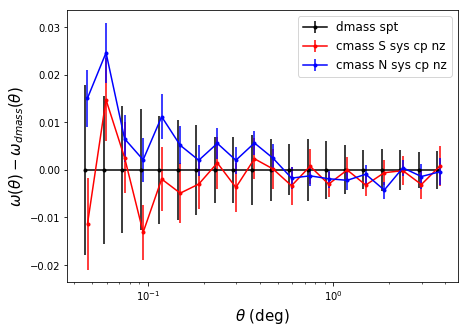

In [89]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

### NGC
DAT11 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]


fig, ax = plt.subplots(figsize = (10, 7))

ax.errorbar(meanr*0.97, xi, yerr = xi_err, fmt = '.', color='k', label='dmass spt')
ax.errorbar(meanr7*1.0, xi7, yerr = xi_err7, fmt = '.r', label='cmass S sys cp nz')
ax.errorbar(meanr11*1.0, xi11, yerr = xi_err11, fmt = '.b', label='cmass N sys cp nz')
ax.plot(theta_th, theory)
ax.plot(theta_th, theory_sgc)

cov_cmass_n = np.genfromtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.cov')
vdiff = xi - xi7
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov_cmass_s)), vdiff)#/vdiff.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlim(0.01, 10)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



fig, ax = plt.subplots(figsize = (7, 5))

ax.errorbar(meanr*0.97, xi-xi, yerr = xi_err, fmt = '.-', color='k', label='dmass spt')
ax.errorbar(meanr7*1.0, xi7-xi, yerr = xi_err7, fmt = '.-r', label='cmass S sys cp nz')
ax.errorbar(meanr11, xi11-xi, yerr = xi_err11, fmt = '.-b', label='cmass N sys cp nz')

cov_cmass_n = np.genfromtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.cov')
vdiff = xi - xi7
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov_cmass_s)), vdiff)#/vdiff.size



ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)

ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)- \omega_{dmass}(\theta)$', fontsize = 15)

In [261]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]



cov_cmass_n = np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_dmass = np.genfromtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.cov')

HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)
HFn = HF(100, 10)
HFs = HF(100, 10)
HFd = HF(100, 10)

print HFn

F_ns = HFn * HFs * np.linalg.inv(cov_cmass_n + cov_cmass_s)
F_nd = HFn * HFd * np.linalg.inv(cov_cmass_n + cov_dmass)
F_sd = HFs * HFd * np.linalg.inv(cov_cmass_s + cov_dmass)

0.888888888889


### 10 bins 

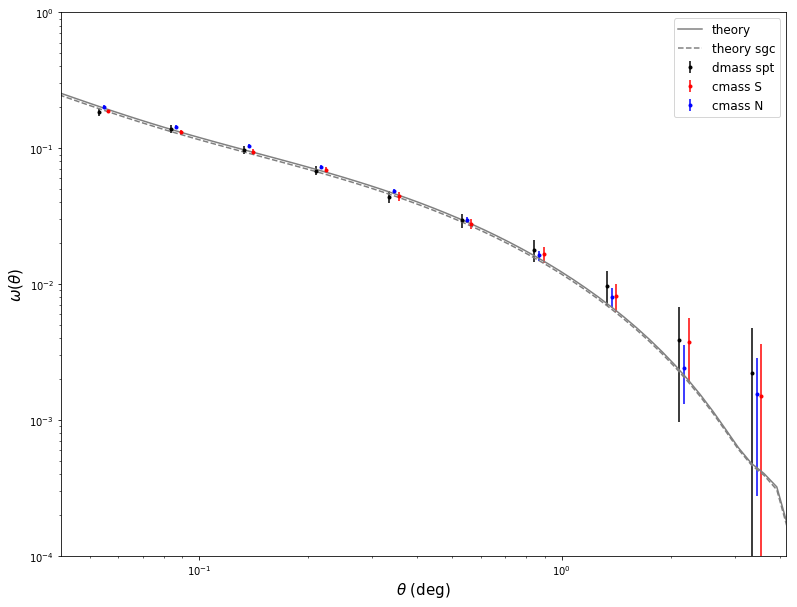

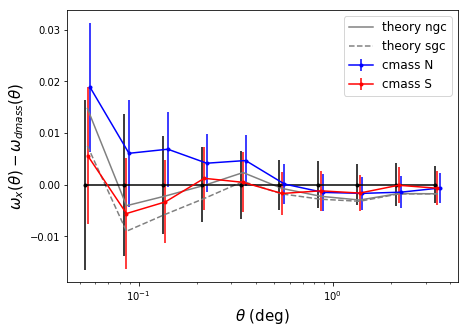

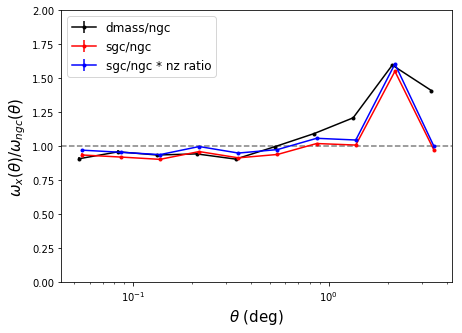

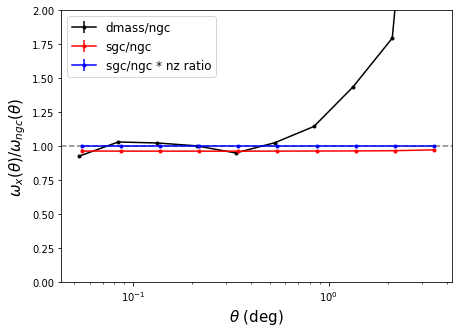

In [262]:

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)


theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)

nzs_ratio = theory_sgc_interp/theory_interp

fig, ax = plt.subplots(figsize = (13, 10))

ax.errorbar(meanr*0.97, xi, yerr = xi_err, fmt = '.', color='k', label='dmass spt')
ax.errorbar(meanr7*1.03, xi7, yerr =xi_err7, fmt = '.r', label='cmass S')
ax.errorbar(meanr11*1.0, xi11, yerr = xi_err11, fmt = '.b', label='cmass N')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)


fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



fig, ax = plt.subplots(figsize = (7, 5))

ax.errorbar(meanr*0.97, xi-xi, yerr = np.sqrt(2)*xi_err, fmt = '.-', color='k')
ax.errorbar(meanr11*1.03, xi11-xi, yerr = np.sqrt(xi_err11**2+xi_err**2), fmt = '.-b', label='cmass N')
ax.errorbar(meanr7*1.0, xi7-xi, yerr = np.sqrt(xi_err7**2+xi_err**2), fmt = '.-r', label='cmass S')

ax.plot(meanr, theory_interp -xi, '-', color='grey',label='theory ngc' )
ax.plot(meanr, theory_sgc_interp -xi, '--', color='grey', label='theory sgc' )

vdiff = xi - xi7
chisqr = np.dot(np.dot( vdiff, F_ns), vdiff)#/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega_x(\theta)- \omega_{dmass}(\theta)$', fontsize = 15)


fig, ax = plt.subplots(figsize = (7, 5))




xi_err_wdwn =  xi/xi11 *np.sqrt( xi_err*2/xi**2 + xi_err11**2/xi11**2  )
xi_err_wswn = xi7/xi11 *np.sqrt( xi_err7*2/xi7**2 + xi_err11**2/xi11**2  )


ax.axhline(y=1.0, ls='--', color='grey')
ax.errorbar(meanr*0.97, xi/xi11, yerr = xi_err, fmt = '.-', color='k', label='dmass/ngc')
ax.errorbar(meanr7*1.0, xi7/xi11, yerr = xi_err, fmt = '.-r', label='sgc/ngc')
ax.errorbar(meanr7*1.0, xi7/xi11 /nzs_ratio, yerr = xi_err, fmt = '.-b', label='sgc/ngc * nz ratio')
#ax.errorbar(meanr11*1.03, xi11-xi, yerr = xi_err11, fmt = '.-b', label='cmass N sys cp nz')



#vdiff = xi - xi7
#chisqr = np.dot(np.dot( vdiff, F_ns), vdiff)#/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_ylim(0.0,2)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega_x(\theta)/\omega_{ngc}(\theta)$', fontsize = 15)



fig, ax = plt.subplots(figsize = (7, 5))
xi_err_wdwn =  xi/theory_interp *np.sqrt( xi_err*2/xi**2 + xi_err11**2/xi11**2  )
xi_err_wswn = xi7/theory_interp *np.sqrt( xi_err7*2/xi7**2 + xi_err11**2/xi11**2  )


ax.axhline(y=1.0, ls='--', color='grey')
ax.errorbar(meanr*0.97, xi/theory_interp, yerr = xi_err, fmt = '.-', color='k', label='dmass/ngc')
ax.errorbar(meanr7*1.0, theory_sgc_interp/theory_interp, yerr = xi_err, fmt = '.-r', label='sgc/ngc')
ax.errorbar(meanr7*1.0, theory_sgc_interp/theory_interp /nzs_ratio, yerr = xi_err, fmt = '.-b', label='sgc/ngc * nz ratio')
#ax.errorbar(meanr11*1.03, xi11-xi, yerr = xi_err11, fmt = '.-b', label='cmass N sys cp nz')



#vdiff = xi - xi7
#chisqr = np.dot(np.dot( vdiff, F_ns), vdiff)#/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_ylim(0.0,2)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega_x(\theta)/\omega_{ngc}(\theta)$', fontsize = 15)

Equations for brel test

In [88]:
def brelchisqr(xi, xi2, invcov, brelsqr):
    DiffVector = xi2 - brelsqr*xi
    chi2 = np.dot( np.dot( DiffVector , invcov), DiffVector )
    return chi2

def find_nearest(array, value, brell):
    
    ind_min = array.argmin()
    array1 = np.asarray(array[:ind_min])
    idx1 = (np.abs(array1 - value)).argmin()
    
    array2 = np.asarray(array[ind_min:])
    idx2 = (np.abs(array2 - value)).argmin()
    
    return brell[:ind_min][idx1], brell[ind_min], brell[ind_min:][idx2]


def brel_chisqr_fitting(xi1, xi2, Fisher, verbose=False):
    
    brelsqr = np.linspace(0.8, 1.2, 5000)   
    brelarr = np.sqrt(brelsqr) 
    chisqr_result = np.zeros(brelsqr.size)
    
    i=0
    for b in brelsqr:
        chisqr_result[i] = brelchisqr(xi1, xi2, Fisher, b)
        i+=1   
        
    minarg = chisqr_result.argmin()
    chisqr_min = chisqr_result.min()
    brel = np.sqrt(brelsqr[minarg])
    
    b_cmass = 2.0
    db = b_cmass * (1. - 1./brel)
    
       
    b_cmass = 2.0

    br1, brmin, br2 = find_nearest( chisqr_result, chisqr_min + 1,brelarr )
    err_brel = np.abs(br1-br2)/2.
    err_db = err_brel *b_cmass
    if verbose : print 'err db, db / br1, brmin, br2 :', err_db, db, br1, brmin, br2  
    #return err_db, db, chisqr_result
    return err_brel, brmin, chisqr_result
    

In [117]:
theta_th, w_theory = np.loadtxt('../data_txt/acf_cmass_theory.txt', unpack=True)
from scipy.interpolate import interp1d

w_theory = interp1d(theta_th, w_theory, kind='cubic')
w_theory = w_theory(meanr11)

In [135]:
mock_n = np.random.multivariate_normal( w_theory, cov_cmass_n, size=1000 )
mock_s = np.random.multivariate_normal( w_theory, cov_cmass_s, size=1000 )
mock_d = np.random.multivariate_normal( w_theory, cov_dmass, size=1000 )

<Container object of 3 artists>

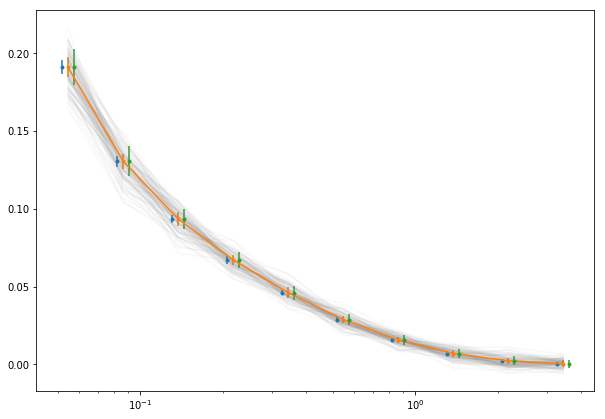

In [119]:
fig, ax = plt.subplots(figsize=(10,7))
for i in range(100): 
    ax.semilogx(meanr, mock_d[i], color='grey', alpha = 0.05)
ax.errorbar(meanr*0.95, w_theory, yerr=np.sqrt(cov_cmass_n.diagonal()), fmt='.')
ax.errorbar(meanr, w_theory, yerr=np.sqrt(cov_cmass_s.diagonal()), fmt='.-')
ax.errorbar(meanr*1.05, w_theory, yerr=np.sqrt(cov_dmass.diagonal()), fmt='.')

In [282]:
brel_ns = np.zeros(1000)
chisqr_array_ns = np.zeros((1000, 5000))
brel_sd = np.zeros(1000)
chisqr_array_sd = np.zeros((1000, 5000))

brel_nd = np.zeros(1000)
chisqr_array_nd = np.zeros((1000, 5000))

#brel_ns_nzs_ratio = np.zeros(5000)
#chisqr_array_ns_nzs_ratio = np.zeros((5000, 5000))

for i in range(1000):
    _, brel_ns[i], chisqr_array_ns[i] = brel_chisqr_fitting(mock_s[i], mock_n[i], F_ns)
    _, brel_nd[i], chisqr_array_nd[i] = brel_chisqr_fitting(mock_d[i], mock_n[i], F_nd)
    _, brel_sd[i], chisqr_array_sd[i] = brel_chisqr_fitting(mock_d[i], mock_s[i], F_sd)
    #_, brel_ns[i], chisqr_array_ns[i] = brel_chisqr_fitting(mock_s[i], w_theory, F_ns)
    #_, brel_nd[i], chisqr_array_nd[i] = brel_chisqr_fitting(mock_d[i], w_theory, F_nd)
    #_, brel_sd[i], chisqr_array_sd[i] = brel_chisqr_fitting(mock_d[i], mock_s[i], F_sd)    
    #_, brel_ns_nzs_ratio[i], chisqr_array_ns_nzs_ratio[i] = brel_chisqr_fitting(mock_s[i], nzs_ratio*mock_n[i], F_sd)
    print i, '\r',
    #brel_n.append(brel_ns)
    #c3hisqr_array_n.append(chisqr_result_ns)
#err_db_nd, db_nd, chisqr_result_nd = brel_chisqr_fitting(xi,  xi11, F_nd)
#err_db_sd, db_sd, chisqr_result_sd = brel_chisqr_fitting(xi,  xi7, F_sd)
#err_db_ns_nzs_ratio, db_ns_nzs_ratio, chisqr_result_ns_nzs_ratio = brel_chisqr_fitting(xi7,  xi11*nzs_ratio, F_ns)

In [264]:
bshift_ns= 1./np.mean(brel_ns)
bshift_nd= 1./np.mean(brel_nd)
bshift_sd= 1./np.mean(brel_sd)
print bshift_ns, bshift_nd, bshift_sd

1.002677085712554 1.0076753453403025 1.0073975020899006


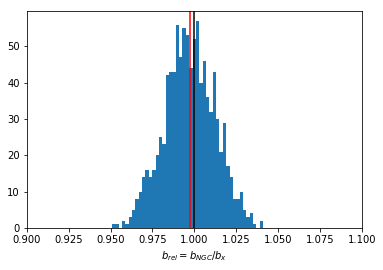

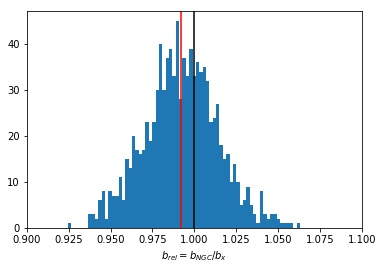

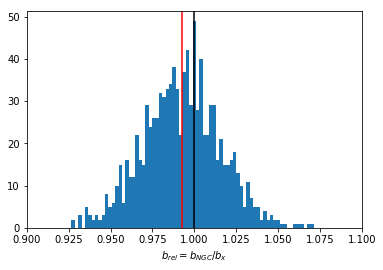

In [265]:
bins, bs = np.linspace(0.8, 1.2, 200, retstep=True)
bincent = bins[:-1] + bs/2.

fig, ax = plt.subplots()
N,_,_ = ax.hist(brel_ns, bins = bins)
meanv = np.sum(bincent * N)/np.sum(N)

meanv = np.mean(brel_ns)
ax.axvline(x = 1.0, color='k')
ax.axvline(x=meanv, color='r')
ax.set_xlim(0.9, 1.1)
ax.set_xlabel('$b_{rel} = b_{NGC} /b_x$')

fig, ax = plt.subplots()
N,_,_ = ax.hist(brel_nd, bins = bins)
meanv = np.sum(bincent * N)/np.sum(N)

meanv = np.mean(brel_nd)
ax.axvline(x = 1.0, color='k')
ax.axvline(x=meanv, color='r')
ax.set_xlim(0.9, 1.1)
ax.set_xlabel('$b_{rel} = b_{NGC} /b_x$')

fig, ax = plt.subplots()
N,_,_ = ax.hist(brel_sd, bins = bins)
meanv = np.sum(bincent * N)/np.sum(N)

meanv = np.mean(brel_sd)
ax.axvline(x = 1.0, color='k')
ax.axvline(x=meanv, color='r')
ax.set_xlim(0.9, 1.1)
ax.set_xlabel('$b_{rel} = b_{NGC} /b_x$')


In [286]:
err_brel_ns, brel_ns, chisqr_result_ns = brel_chisqr_fitting(xi7, xi11, F_ns, verbose=True)
err_brel_nd, brel_nd, chisqr_result_nd = brel_chisqr_fitting(xi,  xi11, F_nd, verbose=True)
err_brel_sd, brel_sd, chisqr_result_sd = brel_chisqr_fitting(xi,  xi7, F_sd, verbose=True)
err_brel_ns_nzs_ratio, brel_ns_nzs_ratio, chisqr_result_ns_nzs_ratio = brel_chisqr_fitting(xi7,  xi11*nzs_ratio, F_ns, verbose=True)

#err_brel_ns, brel_ns, chisqr_result_ns = brel_chisqr_fitting(theory_sgc_interp, theory_interp, F_ns)
#err_brel_nd, brel_nd, chisqr_result_nd = brel_chisqr_fitting(xi,  theory_interp, F_nd)
#err_brel_sd, brel_sd, chisqr_result_sd = brel_chisqr_fitting(xi,  theory_sgc_interp, F_sd)
#err_brel_ns_nzs_ratio, brel_ns_nzs_ratio, chisqr_result_ns_nzs_ratio = brel_chisqr_fitting(theory_sgc_interp,  theory_interp*nzs_ratio, F_ns)

err db, db / br1, brmin, br2 : 0.03286345343141983 0.07881982766382056 1.0244461420590132 1.0410267755199527 1.057309595490433
err db, db / br1, brmin, br2 : 0.050415893040023585 0.07818119640456911 1.0151483168586963 1.0406808364338531 1.06556420989872
err db, db / br1, brmin, br2 : 0.05522618057113238 -0.0026859371286316325 0.9706639159294722 0.9986588325813669 1.0258900965006046
err db, db / br1, brmin, br2 : 0.033486453699607566 0.04241996688556959 1.0047695817362687 1.0216695951981494 1.0382560354358763


7.874813614046144


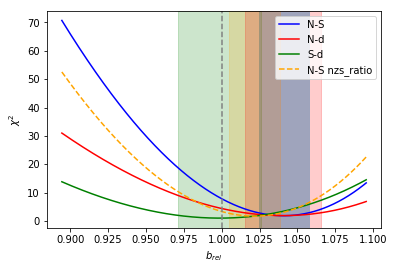

In [287]:
fig, ax = plt.subplots()

brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

ax.plot(brel, chisqr_result_ns, '-b', label='N-S')
#ax.plot(brel, chisqr_result_ns_new, '-m', label='N-S new')
ax.plot(brel, chisqr_result_nd, '-r',label='N-d')
ax.plot(brel, chisqr_result_sd, '-g',label='S-d')
ax.plot(brel, chisqr_result_ns_nzs_ratio, color='orange', ls='--',label='N-S nzs_ratio')

#ax.errorbar(db_ns, chisqr_min_ns, xerr =err_brel_ns *b_cmass)
#ax.errorbar(db_nd, chisqr_min_nd, xerr =err_brel_nd *b_cmass)
#ax.errorbar(db_sd, chisqr_min_sd, xerr =err_brel_sd *b_cmass)

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)
ax.axvspan(brel_ns-err_brel_ns, brel_ns+err_brel_ns, alpha=0.99, color='skyblue')

ax.axvspan(brel_sd-err_brel_sd, brel_sd+err_brel_sd, alpha=0.2, color='green')
ax.axvspan(brel_ns_nzs_ratio-err_brel_ns_nzs_ratio, brel_ns_nzs_ratio+err_brel_ns_nzs_ratio, alpha=0.2, color='orange')
ax.axvspan(brel_nd-err_brel_nd, brel_nd+err_brel_nd, alpha=0.2, color='red')
ax.axvline(x=1.0, color = 'grey', ls='--')
#ax.axvline(x=0, color = 'grey', ls='--')

ax.set_xlabel(r'$b_{rel}$')
ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.axhline(y = chisqr_min_ns+1)
#ax.axhline(y = chisqr_min_nd+1)
#ax.axhline(y = chisqr_min_sd+1)

chinull_ns= brelchisqr(xi7, xi11, F_ns, 1)
chinull_nd= brelchisqr(xi, xi11, F_nd, 1)
chinull_sd= brelchisqr(xi, xi7, F_sd, 1)
print chinull_ns
from scipy.stats.distributions import chi2

#print chi2.sf(chisqr_min_ns,9), chi2.sf(chisqr_min_nd,9), chi2.sf(chisqr_min_sd,9)
#print chi2.sf(chinull_ns,9), chi2.sf(chinull_nd,9), chi2.sf(chinull_sd,9)

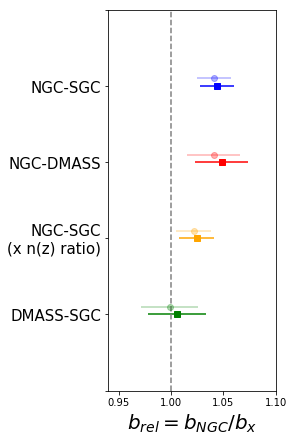

In [288]:
fig, ax = plt.subplots(figsize = (3,7))

brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

ax.errorbar(brel_ns, 4.1, xerr =err_brel_ns, fmt='-o', color='blue', alpha = 0.3)
ax.errorbar(brel_nd, 3.1, xerr =err_brel_nd, fmt='-o', color = 'red', alpha = 0.3)
ax.errorbar(brel_sd, 1.1, xerr =err_brel_sd, fmt='-o', color = 'green', alpha = 0.3)
ax.errorbar(brel_ns_nzs_ratio, 2.1, xerr = err_brel_ns_nzs_ratio, fmt='-o', color='orange', alpha = 0.3)

ax.errorbar(brel_ns*bshift_ns, 4, xerr =err_brel_ns*bshift_ns, fmt='-s', color='blue')
ax.errorbar(brel_nd*bshift_nd, 3, xerr =err_brel_nd*bshift_nd, fmt='-s', color = 'red')
ax.errorbar(brel_sd*bshift_sd, 1, xerr =err_brel_sd*bshift_sd, fmt='-s', color = 'green')
ax.errorbar(brel_ns_nzs_ratio*bshift_ns, 2, xerr = err_brel_ns_nzs_ratio*bshift_ns, fmt='-s', color='orange')

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)
#ax.axvspan(brel_ns-err_brel_ns, brel_ns+err_brel_ns, alpha=0.99, color='skyblue')

#ax.axvspan(brel_sd-err_brel_sd, brel_sd+err_brel_sd, alpha=0.2, color='green')
#ax.axvspan(brel_ns_nzs_ratio-err_brel_ns_nzs_ratio, brel_ns_nzs_ratio+err_db_ns_nzs_ratio, alpha=0.2, color='orange')
#ax.axvspan(brel_nd-err_brel_nd, brel_nd+err_brel_nd, alpha=0.2, color='red')
ax.axvline(x=1.0, color = 'grey', ls='--')
#ax.axvline(x=0, color = 'grey', ls='--')

ax.set_xlabel(r'$b_{rel} = b_{NGC}/b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(0.94, 1.1)
#ax.axhline(y = chisqr_min_ns+1)
#ax.axhline(y = chisqr_min_nd+1)
#ax.axhline(y = chisqr_min_sd+1)

ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['','DMASS-SGC','NGC-SGC\n(x n(z) ratio)', 'NGC-DMASS', 'NGC-SGC' ,''], fontsize = 15) 
#print chi2.sf(chisqr_min_ns,9), chi2.sf(chisqr_min_nd,9), chi2.sf(chisqr_min_sd,9)
#print chi2.sf(chinull_ns,9), chi2.sf(chinull_nd,9), chi2.sf(chinull_sd,9)

0.8668783694954326
7.874813614046144


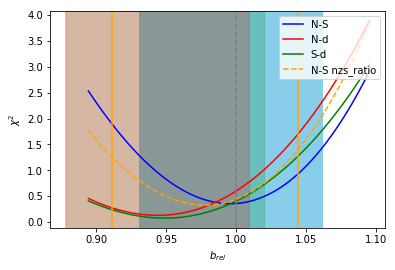

In [289]:
cut = 6
print meanr[cut]
xi7cut = xi7[cut:]
xi11cut = xi11[cut:]
xicut = xi[cut:]
F_nscut = F_ns[cut:,cut:]
F_ndcut = F_nd[cut:,cut:]
F_sdcut = F_sd[cut:,cut:]
nzs_ratio_cut = nzs_ratio[cut:]

err_brel_ns_cut, brel_ns_cut, chisqr_result_ns_cut = brel_chisqr_fitting(xi7cut, xi11cut, F_nscut)
err_brel_nd_cut, brel_nd_cut, chisqr_result_nd_cut = brel_chisqr_fitting(xicut,  xi11cut, F_ndcut)
err_brel_sd_cut, brel_sd_cut, chisqr_result_sd_cut = brel_chisqr_fitting(xicut,  xi7cut, F_sdcut)
err_brel_ns_nzs_ratio_cut, brel_ns_nzs_ratio_cut, chisqr_result_ns_nzs_ratio_cut = brel_chisqr_fitting(xi7cut,  xi11cut*nzs_ratio_cut, F_nscut)


fig, ax = plt.subplots()

brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

ax.plot(brel, chisqr_result_ns_cut, '-b', label='N-S')
#ax.plot(brel, chisqr_result_ns_new, '-m', label='N-S new')
ax.plot(brel, chisqr_result_nd_cut, '-r',label='N-d')
ax.plot(brel, chisqr_result_sd_cut, '-g',label='S-d')
ax.plot(brel, chisqr_result_ns_nzs_ratio_cut, color='orange', ls='--',label='N-S nzs_ratio')

#ax.errorbar(db_ns, chisqr_min_ns, xerr =err_brel_ns *b_cmass)
#ax.errorbar(db_nd, chisqr_min_nd, xerr =err_brel_nd *b_cmass)
#ax.errorbar(db_sd, chisqr_min_sd, xerr =err_brel_sd *b_cmass)

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)
ax.axvspan(brel_ns_cut-err_brel_ns_cut, brel_ns_cut+err_brel_ns_cut, alpha=0.99, color='skyblue')

ax.axvspan(brel_sd_cut-err_brel_sd_cut, brel_sd_cut+err_brel_sd_cut, alpha=0.2, color='green')
#ax.axvspan(brel_ns_nzs_ratio_cut-err_brel_ns_nzs_ratio_cut, brel_ns_nzs_ratio_cut+err_brel_ns_nzs_ratio_cut, alpha=0.2, color='orange')
ax.axvspan(brel_nd_cut-err_brel_nd_cut, brel_nd_cut+err_brel_nd_cut, alpha=0.2, color='red')
ax.axvline(x=1.0, color = 'grey', ls='--')
#ax.axvline(x=0, color = 'grey', ls='--')

ax.axvline(x= brel_ns_nzs_ratio_cut - err_brel_ns_nzs_ratio_cut,color='orange')
ax.axvline(x= brel_ns_nzs_ratio_cut + err_brel_ns_nzs_ratio_cut,color='orange')

ax.set_xlabel(r'$b_{rel}$')
ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.axhline(y = chisqr_min_ns+1)
#ax.axhline(y = chisqr_min_nd+1)
#ax.axhline(y = chisqr_min_sd+1)

chinull_ns= brelchisqr(xi7, xi11, F_ns, 1)
chinull_nd= brelchisqr(xi, xi11, F_nd, 1)
chinull_sd= brelchisqr(xi, xi7, F_sd, 1)
print chinull_ns
from scipy.stats.distributions import chi2

#print chi2.sf(chisqr_min_ns,9), chi2.sf(chisqr_min_nd,9), chi2.sf(chisqr_min_sd,9)
#print chi2.sf(chinull_ns,9), chi2.sf(chinull_nd,9), chi2.sf(chinull_sd,9)

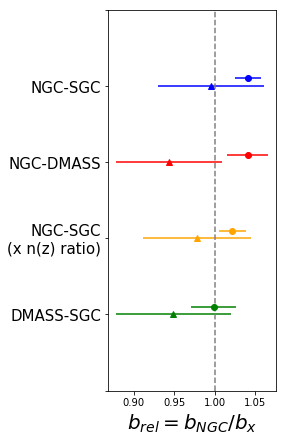

In [290]:
fig, ax = plt.subplots(figsize = (3,7))

brelsqr = np.linspace(0.8, 1.2, 50000) 
b_n = 2.0
brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

ax.errorbar(brel_ns, 4.1, xerr =err_brel_ns, fmt='-o', color='blue')
ax.errorbar(brel_nd, 3.1, xerr =err_brel_nd, fmt='-o', color = 'red')
ax.errorbar(brel_sd, 1.1, xerr =err_brel_sd, fmt='-o', color = 'green')
ax.errorbar(brel_ns_nzs_ratio, 2.1, xerr = err_brel_ns_nzs_ratio, fmt='-o', color='orange')

ax.errorbar(brel_ns_cut, 4, xerr =err_brel_ns_cut, fmt='-^', color='blue')
ax.errorbar(brel_nd_cut, 3, xerr =err_brel_nd_cut, fmt='-^', color = 'red')
ax.errorbar(brel_sd_cut, 1, xerr =err_brel_sd_cut, fmt='-^', color = 'green')
ax.errorbar(brel_ns_nzs_ratio_cut, 2, xerr = err_brel_ns_nzs_ratio_cut, fmt='-^', color='orange')

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)
#ax.axvspan(brel_ns-err_brel_ns, brel_ns+err_brel_ns, alpha=0.99, color='skyblue')

#ax.axvspan(brel_sd-err_brel_sd, brel_sd+err_brel_sd, alpha=0.2, color='green')
#ax.axvspan(brel_ns_nzs_ratio-err_brel_ns_nzs_ratio, brel_ns_nzs_ratio+err_db_ns_nzs_ratio, alpha=0.2, color='orange')
#ax.axvspan(brel_nd-err_brel_nd, brel_nd+err_brel_nd, alpha=0.2, color='red')
ax.axvline(x=1.0, color = 'grey', ls='--')
#ax.axvline(x=0, color = 'grey', ls='--')

ax.set_xlabel(r'$b_{rel} = b_{NGC}/b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.set_xlim(0.94, 1.04)
#ax.axhline(y = chisqr_min_ns+1)
#ax.axhline(y = chisqr_min_nd+1)
#ax.axhline(y = chisqr_min_sd+1)

ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['','DMASS-SGC','NGC-SGC\n(x n(z) ratio)', 'NGC-DMASS', 'NGC-SGC' ,''], fontsize = 15) 
#print chi2.sf(chisqr_min_ns,9), chi2.sf(chisqr_min_nd,9), chi2.sf(chisqr_min_sd,9)
#print chi2.sf(chinull_ns,9), chi2.sf(chinull_nd,9), chi2.sf(chinull_sd,9)

In [278]:
#err_brelcmb_ns, brelcmb_ns = 0.04862097241944835 , 0.8840796815936319
#err_brelcmb_nd, brelcmb_nd = 0.046111922238444736 , 0.8197023940478809
#err_brelcmb_sd, brelcmb_sd = 0.06351927038540772 , 0.7720434408688174

#err_brelcmb_ns_cr, brelcmb_ns_cr = 0.0523498738109524 , 0.9521429517788725
#err_brelcmb_nd_cr, brelcmb_nd_cr = 0.05213087495736796 , 0.9267535197952578
#err_brelcmb_sd_cr, brelcmb_sd_cr = 0.07545058853835453 , 0.9172177530125578


err_brelcmb_ns, brelcmb_ns = 0.11690338067613515 , 0.8852370474094817
err_brelcmb_nd, brelcmb_nd = 0.11786357271454284 , 0.7872974594918983
err_brelcmb_sd, brelcmb_sd = 0.13838767753550707 , 0.7947389477895579

err_brelcmb_ns_cr, brelcmb_ns_cr = 0.1272173234990249 , 0.9633381616704914
err_brelcmb_nd_cr, brelcmb_nd_cr = 0.13433505515671507 , 0.8973226011206445
err_brelcmb_sd_cr, brelcmb_sd_cr = 0.16200564392255426 , 0.9303732621276611

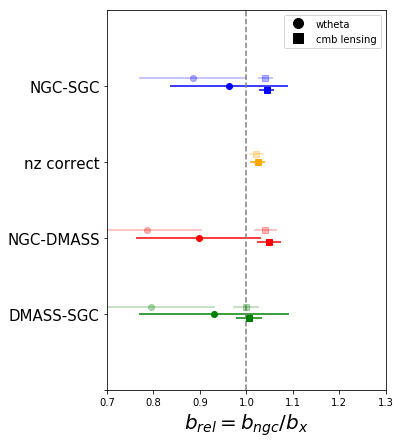

In [293]:
fig, ax = plt.subplots(figsize=(5,7))

brelsqr = np.linspace(0.8, 1.1, 50000) 
b_n = 2.0
brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

#ax.plot(brel, chisqr_result_ns, '-b', label='N-S')
#ax.plot(brel, chisqr_result_nd, '-r',label='N-d')
#ax.plot(brel, chisqr_result_sd, '-g',label='S-d')
#ax.plot(brel, chisqr_result_ns_nzs_ratio, color='orange', ls='--',label='N-S nzs_ratio')

#ax.errorbar(db_ns, chisqr_min_ns, xerr =err_brel_ns *b_cmass)
#ax.errorbar(db_nd, chisqr_min_nd, xerr =err_brel_nd *b_cmass)
#ax.errorbar(db_sd, chisqr_min_sd, xerr =err_brel_sd *b_cmass)

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)

#ax.axvspan(brel_ns_shift-err_brel_ns, brel_ns_shift+err_brel_ns, alpha=0.5, color='skyblue')
#ax.axvspan(brel_nd_shift-err_brel_nd, brel_nd_shift+err_brel_nd, alpha=0.2, color='red')
#ax.axvspan(brel_sd_shift-err_brel_sd, brel_sd_shift+err_brel_sd, alpha=0.2, color='green')
#ax.axvspan(brel_ns_nzs_ratio_shift-err_brel_ns_nzs_ratio, brel_ns_nzs_ratio_shift+err_brel_ns_nzs_ratio, alpha=0.2, color='orange')
ax.axvline(x=1.0, color = 'grey', ls='--')


ax.errorbar(brelcmb_ns, 4.1, xerr = err_brelcmb_ns, fmt='ob', alpha=0.3)
ax.errorbar(brelcmb_nd, 2.1, xerr = err_brelcmb_nd, fmt='or', alpha=0.3)
ax.errorbar(brelcmb_sd, 1.1, xerr = err_brelcmb_sd, fmt='og', alpha=0.3)

ax.errorbar(brelcmb_ns_cr, 4, xerr = err_brelcmb_ns_cr, fmt='ob')
ax.errorbar(brelcmb_nd_cr, 2, xerr = err_brelcmb_nd_cr, fmt='or')
ax.errorbar(brelcmb_sd_cr, 1, xerr = err_brelcmb_sd_cr, fmt='og')

ax.plot(brelcmb_ns,-1, 'ok', label='wtheta', markersize = 10)
ax.plot(brelcmb_ns,-1, 'sk', label='cmb lensing', markersize = 10)


ax.errorbar(brel_ns, 4.1, xerr =err_brel_ns, fmt='-s', color='blue', alpha=0.3)
ax.errorbar(brel_nd, 2.1, xerr =err_brel_nd, fmt='-s', color = 'red', alpha=0.3)
ax.errorbar(brel_sd, 1.1, xerr =err_brel_sd, fmt='-s', color = 'green', alpha=0.3)
ax.errorbar(brel_ns_nzs_ratio, 3.1, xerr = err_brel_ns_nzs_ratio, fmt='-s', color='orange', alpha=0.3)


ax.errorbar(brel_ns*bshift_ns, 3.95, xerr =err_brel_ns*bshift_ns, fmt='-s', color='blue')
ax.errorbar(brel_nd*bshift_nd, 1.95, xerr =err_brel_nd*bshift_nd, fmt='-s', color = 'red')
ax.errorbar(brel_sd*bshift_sd, 0.95, xerr =err_brel_sd*bshift_sd, fmt='-s', color = 'green')
ax.errorbar(brel_ns_nzs_ratio*bshift_ns, 3.0, xerr = err_brel_ns_nzs_ratio*bshift_ns, fmt='-s', color='orange')

#ax.axvspan(brelcmb_ns-err_brelcmb_ns, brelcmb_ns+err_brelcmb_ns, alpha=0.99, color='skyblue')
#ax.axvspan(brelcmb_nd-err_brelcmb_nd, brelcmb_nd+err_brelcmb_nd, alpha=0.2, color='red')
#ax.axvspan(brelcmb_sd-err_brelcmb_sd, brelcmb_sd+err_brelcmb_sd, alpha=0.2, color='green')

ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['','DMASS-SGC','NGC-DMASS', 'nz correct', 'NGC-SGC' ,''], fontsize = 15) 

ax.set_ylim(0,5)
ax.set_xlim(0.7,1.3)

#ax.axvline(x=0, color = 'grey', ls='--')

ax.set_xlabel(r'$b_{rel} = b_{ngc}/b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)



import matplotlib.lines as mlines
import matplotlib.pyplot as plt


In [170]:
brel_ns_cr = brel_ns*bshift_ns
brel_ns_nzs_ratio_cr = brel_ns_nzs_ratio*bshift_ns
brel_nd_cr = brel_nd*bshift_nd
brel_sd_cr = brel_sd*bshift_sd
err_brel_ns_cr = err_brel_ns*bshift_ns
err_brel_ns_nzs_ratio_cr = err_brel_ns_nzs_ratio*bshift_ns
err_brel_nd_cr = err_brel_nd*bshift_nd
err_brel_sd_cr = err_brel_sd*bshift_sd

In [260]:
sigma_diff_ns = np.abs( brelcmb_ns_cr - brel_ns_cr )*1./err_brelcmb_ns_cr
sigma_diff_ns_nzs_ratio = np.abs( brelcmb_ns_cr - brel_ns_nzs_ratio_cr )*1./err_brelcmb_ns_cr
sigma_diff_nd = np.abs( brelcmb_nd_cr - brel_nd_cr )*1./err_brelcmb_nd_cr
sigma_diff_sd = np.abs( brelcmb_sd_cr - brel_sd_cr )*1./err_brelcmb_sd_cr
print 'NS =', sigma_diff_ns
print 'NS(nz ratio)=', sigma_diff_ns_nzs_ratio
print 'ND =', sigma_diff_nd
print 'SD =', sigma_diff_sd

NS = 1.7815285377000427
NS(nz ratio)= 1.410065513474528
ND = 2.3717333472829463
SD = 1.1584176345849162


In [225]:
amidir = '/n/des/lee.5922/data/dmass_cat/ami_result/'
meanr2, xi_cmb_d = np.loadtxt(amidir+'out_DMASS_mean.out', unpack=True)
meanr2, xi_cmb_s = np.loadtxt(amidir+'out_CMASS_South_mean.out', unpack=True)
meanr2, xi_cmb_n = np.loadtxt(amidir+'out_CMASS_North_mean.out', unpack=True)


#xi = xi[2:]
#xis = xis[2:]
#xin = xin[2:]
#meanr = meanr[2:]


meanr_th, xi_theory = np.loadtxt('/n/des/lee.5922/data/cmass_cat/cmassnorth_cmbkappa_galbias1p75.asc', unpack=True)
xi_theory = scipy.interpolate.interp1d(meanr_th, xi_theory, kind='cubic')
xi_theory = xi_theory(meanr2)

cov_cmb_n = np.genfromtxt(amidir+'out_CMASS_North.cov')#[2:,2:]
cov_cmb_s = np.genfromtxt(amidir+'out_CMASS_South.cov')#[2:,2:]
cov_cmb_d = np.genfromtxt(amidir+'out_DMASS.cov')#[2:,2:]

HF = lambda Nr,Nbin: 1#(Nr-Nbin-2) *1./(Nr-1)
HFn = 1. #HF(100, 20)
HFs = 1. #HF(100, 20)
HFd = 1. #HF(100, 20)

print HFn

F_cmb_ns = np.linalg.inv(cov_cmb_n) + np.linalg.inv(cov_cmb_s)
F_cmb_nd = np.linalg.inv(cov_cmb_n) + np.linalg.inv(cov_cmb_d)
F_cmb_sd = np.linalg.inv(cov_cmb_s) + np.linalg.inv(cov_cmb_d)
#cov_cmass = np.linalg.inv(F_cmass)

bshift_cmb_ns ,bshift_cmb_nd,bshift_cmb_sd = 1.0769424657652291, 1.13059541827281, 1.1879606050495575

1.0


In [238]:
#print brelchisqr( xi_cmb_n, xi_theory, F_cmb_ns, brelcmb_ns*bshift_ns*bshift_cmb_ns)
print 'NS ', brelchisqr( xi_cmb_s, xi_cmb_n, F_cmb_ns, brelcmb_ns*bshift_ns*bshift_cmb_ns)/12.
print 'ND ',brelchisqr( xi_cmb_d, xi_cmb_n, F_cmb_nd, brelcmb_nd*bshift_nd*bshift_cmb_nd)/12.
print 'SD ', brelchisqr( xi_cmb_d, xi_cmb_s, F_cmb_ns, brelcmb_ns*bshift_ns*bshift_cmb_ns)/12.

print '\nNS ', brelchisqr( xi_cmb_s, xi_cmb_n, F_cmb_ns, brelcmb_ns)/12.
print 'ND ',brelchisqr( xi_cmb_d, xi_cmb_n, F_cmb_nd, brelcmb_nd)/12.
print 'SD ', brelchisqr( xi_cmb_d, xi_cmb_s, F_cmb_ns, brelcmb_ns)/12.

NS  3.4434378826782837
ND  2.208496580124739
SD  5.770298908496119

NS  3.2644128177370444
ND  1.6835573677838287
SD  5.232531606516466


In [235]:
print brelcmb_ns*bshift_ns*bshift_cmb_ns
print brelcmb_nd*bshift_nd*bshift_cmb_nd
print brelcmb_ns*bshift_ns*bshift_cmb_ns

0.955332298589537
0.9354016294924328
0.955332298589537


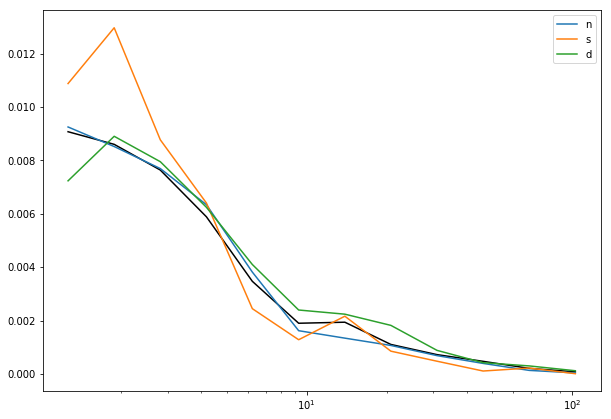

In [224]:
fig, ax = plt.subplots(figsize = (10,7) )
ax.semilogx( meanr2, xi_theory, 'k-')
ax.semilogx( meanr2, xi_cmb_n, label='n')
ax.semilogx( meanr2, xi_cmb_s, label='s')
ax.semilogx( meanr2, xi_cmb_d, label='d')

ax.legend()

41.906053422555715
0.3794857450101999 0.216525088059729 0.7300863183487716
3.419081214388437e-06 7.660798441223286e-05 0.7298143180671901


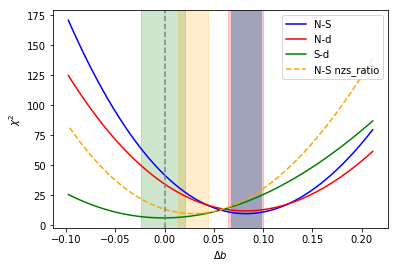

In [729]:
fig, ax = plt.subplots()

brel = np.sqrt(brelsqr)
dbarray = b_n*(1-brel)

ax.plot(dbarray, chisqr_result_ns, '-b', label='N-S')
ax.plot(dbarray, chisqr_result_nd, '-r',label='N-d')
ax.plot(dbarray, chisqr_result_sd, '-g',label='S-d')
ax.plot(dbarray, chisqr_result_ns_nzs_ratio, color='orange', ls='--',label='N-S nzs_ratio')

#ax.errorbar(db_ns, chisqr_min_ns, xerr =err_brel_ns *b_cmass)
#ax.errorbar(db_nd, chisqr_min_nd, xerr =err_brel_nd *b_cmass)
#ax.errorbar(db_sd, chisqr_min_sd, xerr =err_brel_sd *b_cmass)

#ax.axvline(db_ns, lw = err_brel_ns *b_cmass, alpha = 0.5)
ax.axvspan(db_ns-err_db_ns, db_ns+err_db_ns, alpha=0.99, color='skyblue')
ax.axvspan(db_nd-err_db_nd, db_nd+err_db_nd, alpha=0.2, color='red')
ax.axvspan(db_sd-err_db_sd, db_sd+err_db_sd, alpha=0.2, color='green')
ax.axvspan(db_ns_nzs_ratio-err_db_ns_nzs_ratio, db_ns_nzs_ratio+err_db_ns_nzs_ratio, alpha=0.2, color='orange')

ax.axvline(x=0, color = 'grey', ls='--')

ax.set_xlabel(r'$\Delta b$')
ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.axhline(y = chisqr_min_ns+1)
#ax.axhline(y = chisqr_min_nd+1)
#ax.axhline(y = chisqr_min_sd+1)

chinull_ns= brelchisqr(xi7, xi11, F_ns, 1)
chinull_nd= brelchisqr(xi, xi11, F_nd, 1)
chinull_sd= brelchisqr(xi, xi7, F_sd, 1)
print chinull_ns
from scipy.stats.distributions import chi2

print chi2.sf(chisqr_min_ns,9), chi2.sf(chisqr_min_nd,9), chi2.sf(chisqr_min_sd,9)
print chi2.sf(chinull_ns,9), chi2.sf(chinull_nd,9), chi2.sf(chinull_sd,9)

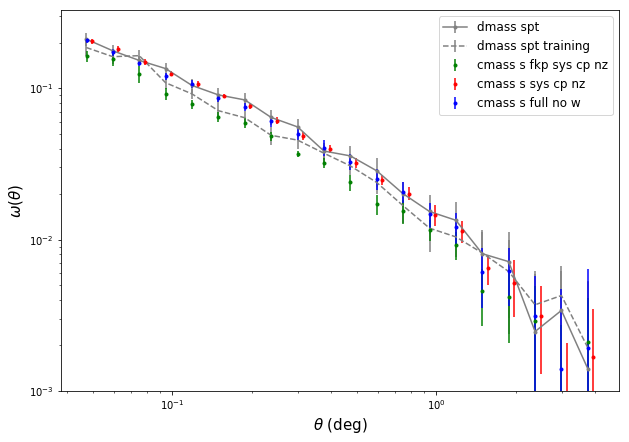

In [149]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_rand.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT12 = np.loadtxt('../data_txt/acf_auto_dmass_spt_weight_training_jk20.txt')
meanr12, xi12, xi_err12 = [DAT12[:,i] for i in range(3)]




#DAT2 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no3.txt')
DAT2 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_weight.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

DAT3 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no_cpweight.txt')
meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

DAT4 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_no_weight.txt')
meanr4, xi4, xi_err4 = [DAT4[:,i] for i in range(3)]

DAT5 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_full_no_weight.txt')
meanr5, xi5, xi_err5 = [DAT5[:,i] for i in range(3)]

DAT6 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_fkp_weight_jk20.txt')
meanr6, xi6, xi_err6 = [DAT6[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk20.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT8 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_fkp_sys_cp_nz_weight_jk20.txt')
meanr8, xi8, xi_err8 = [DAT8[:,i] for i in range(3)]



### NGC
DAT9 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_full_no_weight_jk20.txt')
meanr9, xi9, xi_err9 = [DAT9[:,i] for i in range(3)]

DAT10 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_fkp_sys_cp_nz_weight_jk20.txt')
meanr10, xi10, xi_err10 = [DAT10[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk20.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]


fig, ax = plt.subplots(figsize = (10, 7))

ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.-', color='grey', label='dmass spt')
ax.errorbar(meanr12, xi12, yerr = xi_err12, fmt = '--', color='grey', label='dmass spt training')
#ax.errorbar(meanr2*1.02, xi2, yerr = xi_err2, fmt = '.k', label='cmass s weight')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='cmass s no cp weight')
#ax.errorbar(meanr4*1.0, xi4, yerr = xi_err4, fmt = '.-g', label='cmass s no weight')
#ax.errorbar(meanr6*1.0, xi6, yerr = xi_err6, fmt = '.m', label='cmass s fkp weight')
ax.errorbar(meanr8*1.0, xi8, yerr = xi_err8, fmt = '.g', label='cmass s fkp sys cp nz')
ax.errorbar(meanr7*1.05, xi7, yerr = xi_err7, fmt = '.r', label='cmass s sys cp nz')
ax.errorbar(meanr5*1.0, xi5, yerr = xi_err5, fmt = '.b', label='cmass s full no w')


#ax.errorbar(meanr9*1.0, xi9, yerr = xi_err9, fmt = '--b', label='cmass n full no w')
#ax.errorbar(meanr10*1.05, xi10, yerr = xi_err10, fmt = '--g', label='cmass n fkp sys cp nz')
#ax.errorbar(meanr11*1.05, xi11, yerr = xi_err11, fmt = '--r', label='cmass n sys cp nz')

cov = np.genfromtxt('../data_txt/acf_auto_dmass_spt_no2.cov')
cov_cmass = np.genfromtxt('../data_txt/acf_auto_cmass_sgc_no3.cov')
vdiff = xi - xi2
chisqr = np.dot(np.dot( vdiff, np.linalg.inv(cov)), vdiff)/vdiff.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')

In [145]:
DAT7 = np.loadtxt('../data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt/acf_auto_cmass_ngc_sys_cp_nz_weight_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]

SyntaxError: invalid syntax (<ipython-input-145-7659e9e92318>, line 1)

In [74]:
cmass_sgc['WEIGHT_FKP'].max()

1.0

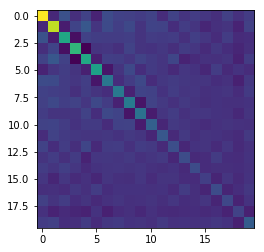

In [20]:
fig, ax = plt.subplots()
ax.imshow(cov_cmass)

In [31]:
np.sum((xi - xi2)**2)/20.

0.00023888812251066457

In [163]:
# calling im3shape'
from cmass_modules.io import getCatalogsWithKeys
shear = getCatalogsWithKeys(keyword = 'im3shape_st82.fits', path = '/n/des/lee.5922/data/')
shear = shear[shear['INFO_FLAG'] == 0]
#shear = changeColumnName( shear, name = 'RA_AS', rename = 'RA' )
#shear = changeColumnName( shear, name = 'DEC_AS', rename = 'DEC' )
shear = Cuts.keepGoodRegion(shear)
shear = Cuts.SpatialCuts(shear, ra=320, ra2=360 , dec=-2, dec2=2 )

Spatial Cut  2108394


In [46]:
# calling cmass
cmass = io.getSGCCMASSphotoObjcat()
cmass = Cuts.keepGoodRegion(cmass)
cmass = Cuts.SpatialCuts(cmass, ra=320, ra2=360, dec=-2, dec2=2)
m1, m2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], merged_des_st82_s['RA'], \
                                     merged_des_st82_s['DEC'], 1./3600, maxmatch=1)
cmass_mask = np.zeros(merged_des_st82_s.size, dtype=bool)
cmass_mask[m2] = 1
clean_cmass_data_des, nocmass = merged_des_st82_s[cmass_mask], merged_des_st82_s[~cmass_mask]

Applying Healpix BOSS SGC footprint mask
Spatial Cut  10641


In [9]:
1/60., 1/60. * 5, 1/60. * 10

(0.016666666666666666, 0.08333333333333333, 0.16666666666666666)

In [15]:
#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
#bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
bins = np.linspace(0, 1/60. * 200, 201)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

bins_log = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
#bins = np.linspace(0.0, 1.5, 16)
bin_centers_log = 0.5 * (bins_log[1:] + bins_log[:-1])


#@pickle_results("correlation_functions_DMASS_st82_even.pkl")
def compute_results(data, bins = None, Nbootstraps=10,  method='landy-szalay', rseed=0):
    
    from astroML.correlation import bootstrap_two_point_angular
    
    np.random.seed(rseed)
    Nbins = bins.size
    
    results = [bins]
    results += bootstrap_two_point_angular(data['RA'], data['DEC'],bins=bins,method=method,Nbootstraps=Nbootstraps)
    return results

In [ ]:
#(bins, r_corr, r_corr_err, r_bootstraps,
# b_corr, b_corr_err, b_bootstraps) = compute_results()

(bins, c_corr, c_corr_err, c_bootstraps) = compute_results(dmass_spt, bins=bins)
(bins, d_corr, d_corr_err, d_bootstraps) = compute_results(cmass_sgc, bins=bins)

DAT = np.column_stack((bin_centers, c_corr, c_corr_err, d_corr, d_corr_err) )
np.savetxt('data_txt/corr_dmass_cmass.txt', DAT, header = 'bin_centers, c_corr2, c_corr_err2, d_corr2, d_corr_err2' )

#(bins, d_corr2, d_corr_err2, d_bootstraps2) = compute_results(dmass_st82, bins=bins)
#(bins_log, d_corr, d_corr_err, d_bootstraps) = compute_results(dmass_st82, bins=bins_log)

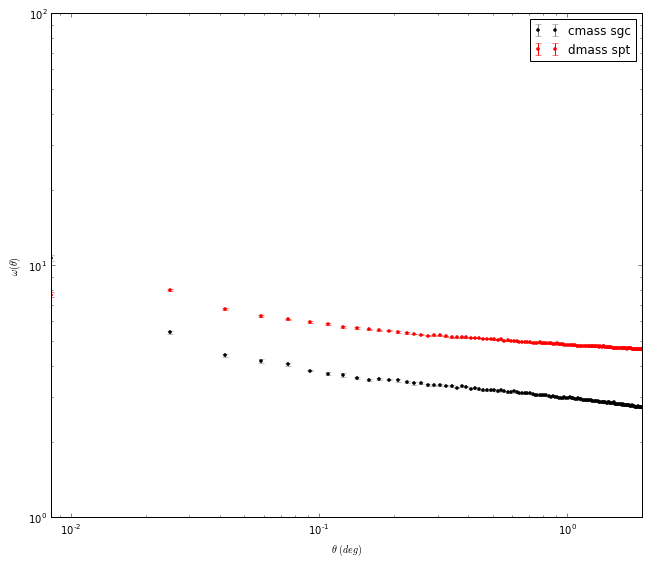

In [61]:
#------------------------------------------------------------
# Plot the results
#corr = [r_corr, b_corr]
#corr_err = [r_corr_err, b_corr_err]
#bootstraps = [r_bootstraps, b_bootstraps]



#labels = '$CMASS~in~st82$\n$N=%i$' % len(cmass)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

ax = fig.add_subplot(111, xscale='linear', yscale='linear')
ax.errorbar(bin_centers, c_corr, c_corr_err,
            fmt='.k', ecolor='gray', lw=1, label = 'cmass sgc')
ax.errorbar(bin_centers, d_corr, d_corr_err,
            fmt='.r', ecolor='red', lw=1, label='dmass spt')
#ax.errorbar(bin_centers, d_corr, d_corr_err,
#            fmt='.b', ecolor='blue', lw=1, label='cmass in des')

#t = np.array([0.01, 10])
#ax.plot(t, 10 * (t / 0.0005) ** -0.7, ':k', linewidth=1)

#ax.text(0.95, 0.95, labels,
#        ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\theta\ (deg)$')
ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xscale('linear')
#if i == 0:
#    ax.set_ylabel(r'$\hat{w}(\theta)$')
ax.legend(loc='best')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0, 2)     
plt.show()

fig.savefig('figure/acf_comparison_dmass_cmass.png')

In [21]:
def plot_z_distribution( cats = None, labels = None, suffix = 'test' ):
    
    import matplotlib.pyplot as plt
    z_bin, s = np.linspace(1e-5, 1.0, 200, retstep=True)
    z_center = z_bin[:-1]+s/2.
    
    fig, axes = plt.subplots( 1, 1, figsize = (8,5))
    N, _= np.histogram(cats['DESDM_ZP'], bins = z_bin)
    
    n = N/ST82Maparea

    axes.bar(z_center, n, s, color='b' )
    axes.set_xlabel('photo_z')
    axes.set_ylabel('n(z)')
    #ax.set_yscale('log')
    axes.legend(loc='best')

    axes.set_title('\nredshift histogram')
    figname ='figure/hist_z_'+suffix+'.png'
    fig.savefig(figname)
    print 'saving fig to ',figname
    
    DAT = np.column_stack((z_center, n))
    filename = 'data_txt/z_distribution_'+suffix+'.txt'
    np.savetxt(filename, DAT, header = 'z, n(z)')
    print 'saving data to ',filename

saving fig to  figure/hist_z_dmass_st82.png
saving data to  data_txt/z_distribution_dmass_st82.txt


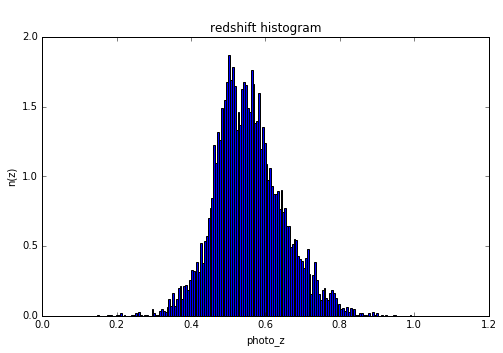

In [20]:
plot_z_distribution( cats = dmass_st82, labels = 'dmass_st82', suffix = 'dmass_st82' )

In [ ]:
plot_z_distribution( cats = dmass_st82, labels = '_dmass_st82', suffix = 'dmass_st82_binedge' )

In [60]:
dmass_st82.shape

(7564,)

In [133]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    mu, sigma = np.mean(data['DESDM_ZP']), np.std(data['DESDM_ZP'])
    z_R = np.random.normal(mu, sigma, size)
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float'), ('DESDM_ZP', 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
    data_R['DESDM_ZP'] = z_R
                              
    return data_R

data_R = uniform_random_on_sphere(dmass_st82, size = 100 * dmass_st82.size)
data_R = Cuts.keepGoodRegion(data_R)
data_R_t = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * clean_cmass_data_des.size)
data_R_t = Cuts.keepGoodRegion(data_R_t)

In [110]:
data_R.size, dmass_st82.size

(575807, 7564)

In [114]:
from systematics_module.corr import angular_correlation
angular_correlation(data = dmass_st82, rand = data_R, weight = None, suffix = '_dmass_st82', out = None)
angular_correlation(data = clean_cmass_data_des, rand = data_R_t, weight = None, suffix = '_cmass_st82', out = None)

calculate angular correlation function
X (300, 2)  centers (30, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [ 7 16 18  9  5 14  8  9  5 15  9  9 11 10 14 11 12 18  9  6  9  8  4  7  9
  7 10  8 11 12]
X (7564, 2)  centers (30, 2)  tol=1e-05  maxiter=200
75 iterations  cluster sizes: [302 361 360 149 159 244 231 260 212 277 363 206 245 302 179 267 213 323
 325 208 209 231 216 208 239 161 243 292 301 278]
saving data file to :  data_txt/acf_comparison_dmass_st82.txt
calculate angular correlation function
X (300, 2)  centers (30, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [24 16  5  5  8 11  3 10  7  8 18  9  3 12  8  7  7  8  7 12 13  6 14  7  6
 21  5  7 18 15]
X (8013, 2)  centers (30, 2)  tol=1e-05  maxiter=200
78 iterations  cluster sizes: [425 345 135 268 254 257 198 265 341 264 268 212 192 272 290 275 368 238
 365 293 291 233 182 246 293 278 160 215 282 308]
saving data file to :  data_txt/acf_comparison_cmass_st82.txt


0

In [115]:
DAT = np.loadtxt('data_txt/acf_comparison_dmass_st82.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_st82.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

[[  4.75622923e-02   1.98527299e-01   7.23450349e-02]
 [  5.95735917e-02   1.05857921e-01   5.51298715e-02]
 [  7.49705238e-02   1.39484907e-01   3.27807555e-02]
 [  9.40332834e-02   9.01407601e-02   4.11311830e-02]
 [  1.18809198e-01   9.96324876e-02   2.64148285e-02]
 [  1.49514395e-01   1.01459637e-01   2.66591897e-02]
 [  1.88137421e-01   5.35880020e-02   2.29104788e-02]
 [  2.36777528e-01   5.38897250e-02   2.37350815e-02]
 [  2.98015323e-01   2.87036290e-02   1.32216190e-02]
 [  3.75271521e-01   3.04660219e-02   2.09212846e-02]
 [  4.72578917e-01   4.01029124e-02   1.94887369e-02]
 [  5.94734524e-01   1.10201600e-02   1.69557085e-02]
 [  7.48467997e-01   2.04154742e-02   1.75261865e-02]
 [  9.41856116e-01   1.03631282e-02   1.25646825e-02]
 [  1.18601246e+00   1.27935469e-02   1.84526208e-02]
 [  1.49157363e+00  -2.71682995e-03   2.10311429e-02]
 [  1.87608897e+00  -6.16829870e-03   2.34911280e-02]
 [  2.36002107e+00  -1.65452310e-03   1.07857442e-02]
 [  2.96586651e+00  -1.14282

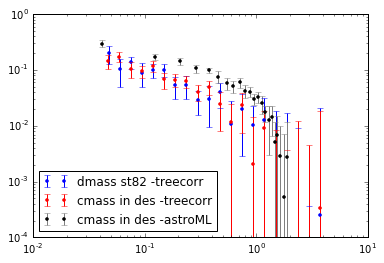

In [116]:
fig, ax = plt.subplots()
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.b', label='dmass st82 -treecorr')
ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '.r', label='cmass in des -treecorr')
ax.errorbar(bin_centers, c_corr2, c_corr_err2,
            fmt='.k', ecolor='gray', lw=1, label = 'cmass in des -astroML')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best')

In [ ]:
source_R = uniform_random_on_sphere(shear, size = shear.size)
source_R = Cuts.keepGoodRegion(source_R)

In [192]:
from systematics_module.corr import LensingSignal, cross_angular_correlation, angular_correlation
LensingSignal(lense = clean_cmass_data_des, source = shear, rand = data_R, suffix = 'cmass')
LensingSignal(lense = dmass_st82, source = shear, rand = data_R, suffix = 'dmass')

Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (179, 2)  centers (10, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [13 19 13 26 16 12 21 14 25 20]
X (8013, 2)  centers (10, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [811 668 827 863 702 770 830 826 919 797]
saving data file to :  data_txt/lensing_cmass.txt
Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (173, 2)  centers (10, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [17  6 15 24 16 15 16 21 28 15]
X (7564, 2)  centers (10, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [ 662  521  501  913  958  621  714  763 1090  821]
saving data file to :  data_txt/lensing_dmass.txt


saving fig to : figure/lensing_comparison.png


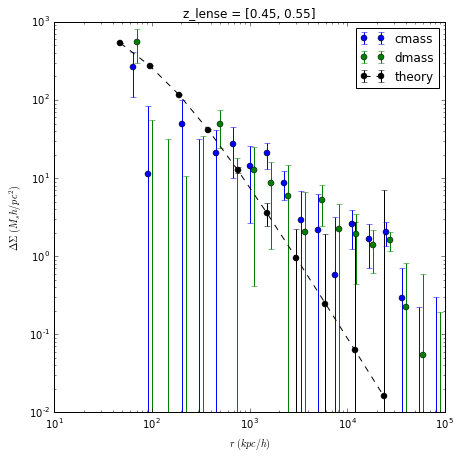

In [193]:
# plotting

labels = ['cmass', 'dmass']
lensingdat = [np.loadtxt('data_txt/lensing_'+s+'.txt') for s in labels ]

#r_p_bins, LensSignal, LSjkerr, correctedLensSignal, CLSjkerr, BoostFactor, Boostjkerr = lensingdat[:,0], lensingdat[:,1],lensingdat[:,2],lensingdat[:,3],lensingdat[:,4],lensingdat[:,5],lensingdat[:,6]
fig, ax = plt.subplots(1,1, figsize = (7,7))

for j in range(len(labels)):

    r_p_bins, LensSignal, LSjkerr = [lensingdat[j][:,i] for i in range(lensingdat[0][0].size)]
    ax.errorbar(r_p_bins * (1 + 0.1*j), LensSignal, yerr = LSjkerr, fmt='o', label = labels[j])

theory = np.loadtxt('data_txt/smd_v_theta_cmass.dat')
rr_the = theory[:,0]
delta_sigma_the = theory[:,1]
error_the = theory[:,2] * np.sqrt(5000/120)
ax.errorbar(10**rr_the, 10**delta_sigma_the, yerr = 10**error_the, color = 'black', fmt='--o', label = 'theory')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 1e5)
ax.set_ylim(1e-2,1e3)
ax.set_xlabel(r'$r$ $(kpc/h)$')
ax.set_ylabel(r'$\Delta\Sigma$ $(M_{s}h/pc^{2})$')
ax.set_title('z_lense = [0.45, 0.55]'  )
ax.legend(loc = 'best')

figname='figure/lensing_comparison.png'
fig.savefig(figname)
print 'saving fig to :', figname